# Marinvaders - example tutorial


<a href="https://mybinder.org/v2/gl/marinvaders%2Fmarinvaders/master?filepath=%2Fdocs%2Fmarinvaders.ipynb">
<img style="float: left" width="100" height="100"  src="https://mybinder.org/badge_logo.svg">
&nbsp;
try the notebook online
</a> 
<br>
<a href="https://gitlab.com/dlab-indecol/marinvaders/-/blob/master/LICENSE/">
<img style="float: left" width="100" height="100"  src="https://img.shields.io/badge/License-GPLv3-blue.svg">
&nbsp; 
software license
</a> 


## Introduction

The Marine Invaders toolkit (Marinvaders) cross-references several marine 
databases to gather information on the native and alien distribution of 
marine species.

Marinvaders allows to assess the alien and native status of a specific 
species accross [eco-regions](https://en.wikipedia.org/wiki/Marine_ecoregions) and to list all alien and native species within a 
specific eco-region.

This is done by quering the [OBIS](https://obis.org/) data for distributions 
of species and linking this data to the native/alien assessment in the 
[WoRMS](http://www.marinespecies.org/index.php), 
[GISD](http://www.iucngisd.org/gisd/) and 
[NatCon](https://www.conservationgateway.org/ConservationPractices/Marine/Pages/marineinvasives.aspx) 
data bases. Marinvaders aims to facilitate the development of large-scale 
impact assessments of marine invasive species.

The Open Source code [GNU GPL 
v3](https://www.gnu.org/licenses/gpl-3.0.en.html) of marinvaders [can be found on 
Gitlab](https://gitlab.com/dlab-indecol/marinvaders), where you can also read more about the data sources and data handling. 

The following tutorial consists of two parts. In
- [Species analysis](#Species-analysis) , we investigate the native and invasive distribution of a certain species. In
- [Eco-region assessment](#Eco-region-assessment), we explore native and 
alien species within a specific eco-region

For both sections, we need the marinvaders library. See the 
[README](https://gitlab.com/dlab-indecol/marinvaders/-/blob/master/README.md) at the 
repository for the full installation instructions.

In [1]:
import marinvaders

For convenience, we are using [itable](https://github.com/mwouts/itables) heres to show interactive pandas DataFrames.
This does only work in the classic Jupyter Notebook view (not in in 
JupyterLab). If you are running the latter, switch to the classic view in 
"Help - Launch Classic Notebook" or remove the next cell (itables adds interactive filtering and search to the pandas.DataFrames - the notebook can also used without that).

In [2]:
import itables.options as opt

opt.classes = ["display", "nowrap"]
opt.columnDefs = [{"width": "120px", "targets": "_all"}]
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

# If you receive a read "Javascript Error" here, see explanation above.

<IPython.core.display.Javascript object>

With all the setup out of the way, we can start with the first analysis.

## Species analysis

<img style="float: right" alt="a striped barnacle" src="http://images.marinespecies.org/thumbs/12795_paarsgestreepte-zeepok.jpg?w=200"> 

Here we analyse the native and invasive distribution of a certain species.
As an example we use *Amphibalanus amphitrite* (Darwin, 1854), aka the
[striped barnacle](https://en.wikipedia.org/wiki/Amphibalanus_amphitrite). 

Since species names can change as part of taxonomic restructuring, 
marinvaders uses the AphiaID to specify a certain species. We can obtain 
this id from the [World Register of Marine Species, 
WORMS](https://www.marinespecies.org):

In the search field there, enter the species 
name and you get forwarded to the [WORMS register of this 
barnacle.](https://www.marinespecies.org/aphia.php?p=taxdetails&id=421137).  
The AphiaID is stated as first entry in the overview (which is the same as 
the id used in the url). You can either use the integer number or the full 
universal identifiers string ('urn:lsid:marinespecies.org:taxname:421137'). 


Thus (this command might take some time as it collects information from 
various web data-sources):


In [3]:
species_data = marinvaders.Species(aphia_id=421137)

We can now investigate all recorded observations of this this species:

In [4]:
species_data.all_occurrences

index  aphiaID  decimalLatitude  decimalLongitude  \
0        0   421137        21.282800       -157.841000   
1        1   421137        27.368883        -80.229433   
2        2   421137        -5.992131         12.403049   
3        3   421137        51.028760          2.374360   
4        4   421137       -12.460000        130.849170   
5        5   421137       -25.983299         32.783298   
6        6   421137        32.500000        122.500000   
11      11   421137        34.305500        135.123990   
12      12   421137        -2.199580        -80.871980   
13      13   421137        33.829357       -118.536987   
17      17   421137       -36.867880        174.809390   
18      18   421137        -3.505433        -38.895667   
19      19   422776        40.630000         22.930000   
22      23   421137         9.966667         76.216667   
24      25   421137        42.833330         12.833330   
29      31   422776        22.336075        -97.632713   
30      32   421137       -12.067000        131.334000   
33      35   421137        32.768800        -79.885712   
35      37   422776        13.810000        120.459999   
37      39   421137       -33.805000        151.224990   
39      41   422776        28.136902        -92.045013   
42      44   421137       -25.050000        153.083000   
44      47   421137        44.583330          1.000000   
47      50   421137        38.037626        -76.321891   
48      51   421137        31.207894         29.890154   
49      52   421137        50.365556         -4.110555   
50      53   421137       -34.660000        -57.660000   
51      54   421137       -37.975000        147.684000   
52      55   421137       -42.883000        147.333000   
60      63   422776       -29.667601         31.153601   
66      70   421137       -34.391700        172.773300   
70      74   421137       -23.622433        -45.375000   
73      80   421137       -39.060001        174.024994   
74      81   422776        25.266667         60.666667   
76      84   421137       -33.981161         25.655092   
81      90   421137        -7.235786        112.770882   
97     111   421137        27.000000         51.000000   
104    125   422776        23.026548        -82.892311   
106    134   421137        10.503000        -68.156000   
110    139   422776        13.430000        144.663000   
111    140   421137        37.500000         14.000000   
114    144   421137        26.641199        142.161000   

                     species  ECO_CODE  \
0    Amphibalanus amphitrite     25152   
1    Amphibalanus amphitrite     20070   
2    Amphibalanus amphitrite     25085   
3    Amphibalanus amphitrite     20025   
4    Amphibalanus amphitrite     20141   
5    Amphibalanus amphitrite     20102   
6    Amphibalanus amphitrite     20052   
11   Amphibalanus amphitrite     20051   
12   Amphibalanus amphitrite     20171   
13   Amphibalanus amphitrite     25059   
17   Amphibalanus amphitrite     25196   
18   Amphibalanus amphitrite     20075   
19   Amphibalanus amphitrite     25031   
22   Amphibalanus amphitrite     20103   
24   Amphibalanus amphitrite     20030   
29   Amphibalanus amphitrite     20069   
30   Amphibalanus amphitrite     20140   
33   Amphibalanus amphitrite     25042   
35   Amphibalanus amphitrite     20127   
37   Amphibalanus amphitrite     20203   
39   Amphibalanus amphitrite     20043   
42   Amphibalanus amphitrite     20202   
44   Amphibalanus amphitrite     20027   
47   Amphibalanus amphitrite     20041   
48   Amphibalanus amphitrite     25032   
49   Amphibalanus amphitrite     20026   
50   Amphibalanus amphitrite     20182   
51   Amphibalanus amphitrite     20204   
52   Amphibalanus amphitrite     20205   
60   Amphibalanus amphitrite     20193   
66   Amphibalanus amphitrite     20197   
70   Amphibalanus amphitrite     20180   
73   Amphibalanus amphitrite     25199   
74   Amphibalanus amphitrite     20091   
76   Amphibalanus amphitrite     20192  

By linking this data from the OBIS database to the information for alien  species status in TODO DATABASES we can get all regions where this species is  reported as alien/invasive:


In [5]:
species_data.reported_as_alien

ECOREGION  MRGID  aphiaID dataset  decimalLatitude  \
0                       Floridian   4288   421137   WoRMS              NaN   
1         Northern Gulf of Mexico   4288   421137   WoRMS              NaN   
2         Southern Gulf of Mexico   4288   421137   WoRMS              NaN   
3                Greater Antilles   4288   421137   WoRMS              NaN   
4        Central Kuroshio Current  25488   421137   WoRMS              NaN   
5                  East China Sea  25488   421137   WoRMS              NaN   
6                 Mariana Islands  25488   421137   WoRMS              NaN   
7               Ogasawara Islands  25488   421137   WoRMS              NaN   
8                       North Sea  26567   421137   WoRMS              NaN   
9   South European Atlantic Shelf  25218   421137   WoRMS              NaN   
10             Southern Caribbean  25311   421137   WoRMS              NaN   
11            Central New Zealand  25663   421137   WoRMS              NaN   
12       Northeastern New Zealand  25663   421137   WoRMS              NaN   
13         Three Kings-North Cape  25663   421137   WoRMS              NaN   
14                    Celtic Seas   5696   421137   WoRMS              NaN   
15                     Carolinian  25365   421137   WoRMS              NaN   
16                      Virginian  25365   421137   WoRMS              NaN   
17      Southern California Bight  25587   421137   WoRMS              NaN   
18                         Hawaii  25578   421137   WoRMS              NaN   
19                      Guayaquil  25642   421137   WoRMS              NaN   
20            Northeastern Brazil  25520   421137   WoRMS              NaN   
21            Southeastern Brazil  25520   421137   WoRMS              NaN   
22                        Bassian  25471   421137   WoRMS              NaN   
23                      Cape Howe  25471   421137   WoRMS              NaN   
24                Bonaparte Coast  25530   421137   WoRMS              NaN   

    decimalLongitude establishmentMeans  \
0                NaN              Alien   
1                NaN              Alien   
2                NaN              Alien   
3                NaN              Alien   
4                NaN              Alien   
5                NaN              Alien   
6                NaN              Alien   
7                NaN              Alien   
8                NaN              Alien   
9                NaN              Alien   
10               NaN              Alien   
11               NaN              Alien   
12               NaN              Alien   
13               NaN              Alien   
14               NaN              Alien   
15               NaN              Alien   
16               NaN              Alien   
17               NaN              Alien   
18               NaN              Alien   
19               NaN              Alien   
20               NaN              Alien   
21               NaN              Alien   
22               NaN              Alien   
23               NaN              Alien   
24               NaN              Alien   

                                             geometry  \
0   POLYGON ((-81.97706952087646 28.83336952737858...   
1   POLYGON ((-87.40305256476859 33.90911062310147...   
2   POLYGON ((-85.51109055634709 25.65965355590941...   
3   POLYGON ((-82.5383049536685 24.24207509019863,...   
4   POLYGON ((143.8501186970267 34.18024662096803,...   
5   POLYGON ((129.5545136418626 32.0998296884091, ...   
6   POLYGON ((146.9248077396948 10.70684636204601,...   
7   (POLYGON ((155.259128831058 21.19714715226621,...   
8   POLYGON ((0.8333394270639474 62.75159264121129...   
9   POLYGON ((-7.000000309245934 36.00000023443602...   
10  POLYGON ((-62.20659790776989 11.60587855874172...   
11  (POLYGON ((-179.1985957873049 -40.986042397179...   
12  (POLYGON ((-178.3659247250292 -39.869030473869...   
13  POLYGON ((175.6146422072102 -32.15873124987246...   
14  POLYGON ((-3.9999

In this table the data-source for the assessment as alien is reported in column "dataset".

Finally, we can also visualize these different perspectives with:

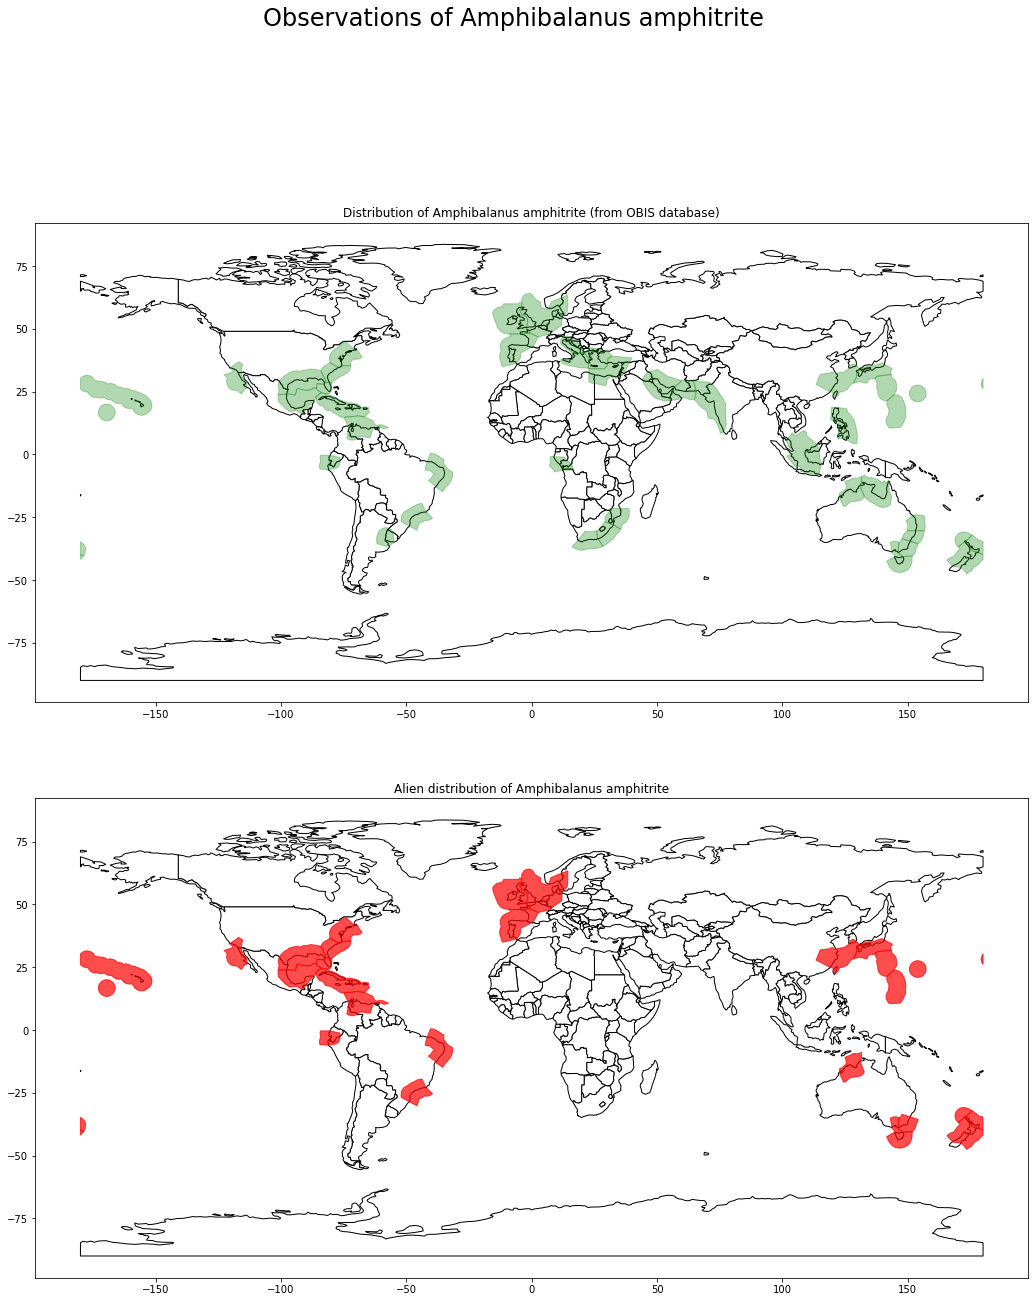

In [6]:
species_data.plot()

## Eco-region assessment

Marinvaders connects data form various databases to gather a list of native 
and alien species present in a given eoc-region. 

Here, we will investigate the species present in an area south of 
New-Zealand.. 

To do so, we first need to get the eco-region code of this eco-region. 
The following command lists all eco-regions available in marinvaders

In [7]:
import marinvaders

In [8]:
marinvaders.marine_ecoregions()

ECO_CODE  ECO_CODE_X                    ECOREGION  \
0       20192         192                 Agulhas Bank   
1       20053          53             Aleutian Islands   
2       20072          72                     Amazonia   
3       20194         194            Amsterdam-St Paul   
4       20228         228  Amundsen/Bellingshausen Sea   
..        ...         ...                          ...   
227     25034          34                   Ionian Sea   
228     25031          31                   Aegean Sea   
229     25036          36                  Alboran Sea   
230     25035          35        Western Mediterranean   
231     25010          10      High Arctic Archipelago   

                             PROVINCE                        REALM  \
0                             Agulhas    Temperate Southern Africa   
1    Cold Temperate Northeast Pacific   Temperate Northern Pacific   
2                  North Brazil Shelf            Tropical Atlantic   
3                   Amsterdam-St Paul    Temperate Southern Africa   
4          Continental High Antarctic               Southern Ocean   
..                                ...                          ...   
227                 Mediterranean Sea  Temperate Northern Atlantic   
228                 Mediterranean Sea  Temperate Northern Atlantic   
229                 Mediterranean Sea  Temperate Northern Atlantic   
230                 Mediterranean Sea  Temperate Northern Atlantic   
231                            Arctic                       Arctic   

                                              geometry  
0    POLYGON ((28.35993 -36.64435, 28.28350 -36.676...  
1    MULTIPOLYGON (((-173.39419 55.59807, -168.5559...  
2    POLYGON ((-41.13012 0.47319, -41.03905 0.44390...  
3    POLYGON ((77.52994 -34.52290, 77.92307 -34.545...  
4    POLYGON ((-72.94222 -74.30962, -79.88636 -75.1...  
..                                                 ...  
227  POLYGON ((18.28997 40.28222, 18.46579 40.19296...  
228  POLYGON ((26.80983 41.87778, 29.19196 41.03381...  
229  POLYGON ((0.32179 32.44572, 0.23032 32.38912, ...  
230  POLYGON ((12.48402 37.99237, 11.95092 37.85696...  
231  POLYGON ((-101.62650 75.65949, -101.62650 75.6...  

[232 rows x 6 columns]

When using interacitve [itable](https://github.com/mwouts/itables) you can 
use the search field in the upper right corner to search for a specific 
eco-region. Alternative, we can use core [pandas](https://pandas.pydata.org/) 
functionality to filter the dataframe:

In [9]:
mar_ecoreg = marinvaders.marine_ecoregions()
mar_ecoreg[mar_ecoreg.ECOREGION.str.contains('auckland', case=False)]

ECO_CODE  ECO_CODE_X        ECOREGION                  PROVINCE  \
12     20232         232  Auckland Island  Subantarctic New Zealand   

             REALM                                           geometry  
12  Southern Ocean  POLYGON ((168.73676 -49.64412, 166.15766 -54.2...

With that, we find the eco-region code: 20232

In [10]:
selected_eco_code = 20232

We can now first check where this region is located:

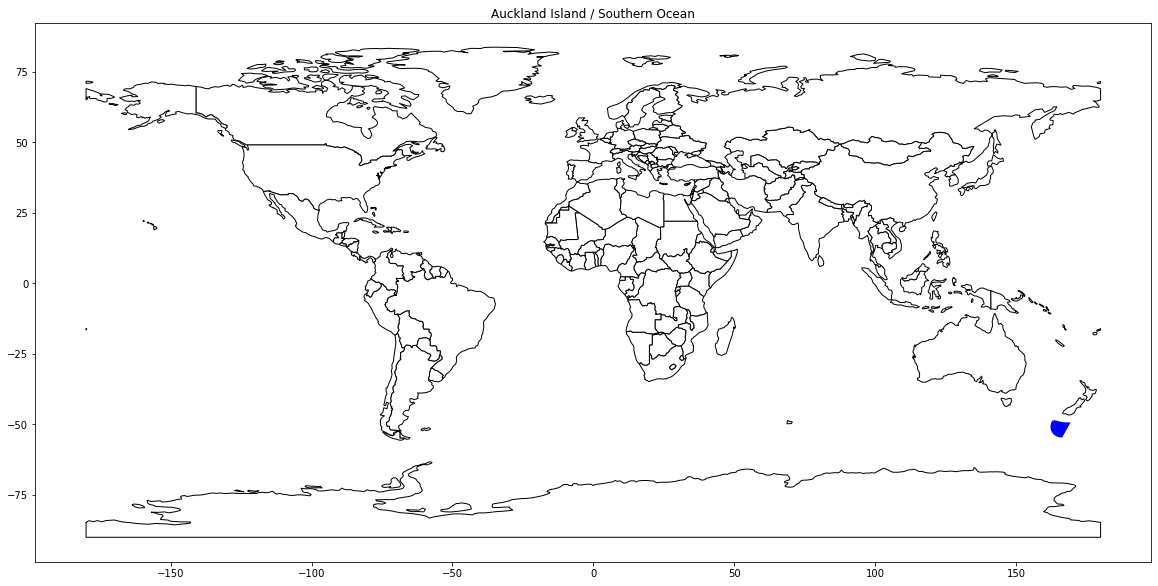

In [11]:
marinvaders.plot(eco_code=selected_eco_code)

Now, we can use marinvaders to get an overview about the marine life in this 
region. **Note** that the following command can take quite some time, as it 
gathers data from remote and local sources for all species present in the selected eco-region.

In [12]:
eco_region_data = marinvaders.MarineLife(eco_code=selected_eco_code)

Lets check the species reported to occur in this region.

In [13]:
print(f"Found {len(eco_region_data.all_species)} species: some examples include are  {', '.join(eco_region_data.all_species[:10])}.")

Found 926 species: some examples include are  Nototodarus sloanii, Lotella rhacina, Micromesistius australis, Metanephrops challengeri, Terebella haplochaeta, Phocarctos hookeri, Coelorinchus aspercephalus, Thalassarche steadi, Chiloguembelina cubensis, Errina cheilopora.


We can then also extract all species report alien in this region:

In [14]:
eco_region_data.aliens

ECOREGION  ECO_CODE_X  MRGID  aphiaID  decimalLatitude  \
0  Auckland Island         232  25473   117388              NaN   
1  Auckland Island         232  25473   140481              NaN   

   decimalLongitude establishmentMeans  \
0               NaN              Alien   
1               NaN              Alien   

                                            geometry  index  \
0  POLYGON ((168.7367649117031 -49.6441184613123,...    NaN   
1  POLYGON ((168.7367649117031 -49.6441184613123,...    NaN   

                     species  ECO_CODE dataset  
0          Obelia geniculata     20232   WoRMS  
1  Mytilus galloprovincialis     20232   WoRMS

and check all species which are effected by species coming from this region.

In [15]:
print(f"Found {len(eco_region_data.aliens)} alien species in that region: {', '.join(eco_region_data.aliens.species)}")

Found 2 alien species in that region: Obelia geniculata, Mytilus galloprovincialis


In [16]:
eco_region_data.affected_by_invasive

species  aphiaID
0           Thalassarche steadi  1348515
186  Procellaria aequinoctialis   212651
470    Thalassarche chrysostoma   225760
478       Phoebetria palpebrata   212631
489            Diomedea exulans   212583
556          Pachyptila salvini   225961
559           Pachyptila turtur   212648
561    Thalassarche melanophris   343995
619         Pterodroma lessonii   212642
622     Aptenodytes patagonicus   212656
623         Pachyptila desolata   212649
633         Diomedea epomophora   344000
637         Eudyptes chrysocome   212657
640         Procellaria cinerea   212652
642        Charadrius bicinctus  1436379
645             Garrodia nereis   293022
648       Eudyptes chrysolophus   212658
649        Megadyptes antipodes   225968
652           Eudyptes robustus   225944

Internally, all this perspectives are extracted from a Pandas DataFrame which
was filled by the MarinLife(eco_code) initiation. This DataFrame can be 
inspected with

In [17]:
eco_region_data.observations

ECOREGION  ECO_CODE_X  MRGID  \
0                                   Southern Red Sea          88  14289   
26                                  Southern Red Sea          88  14289   
27                                      Gulf of Aden          89  14289   
53                                      Gulf of Aden          89  14289   
54                            Arabian (Persian) Gulf          90  14289   
...                                              ...         ...    ...   
14969                               Hawaiian Islands         152  26560   
15011                                          Namib         190   1914   
15046                            Northern California          58   1908   
15067  Oregon, Washington, Vancouver Coast and Shelf          57   1908   
15123                     Puget Trough/Georgia Basin          56   8493   

       aphiaID dataset  decimalLatitude  decimalLongitude establishmentMeans  \
0       290021   WoRMS       -50.650002        167.660004               None   
26      250047   WoRMS       -50.814000        166.093000               None   
27      290021   WoRMS       -50.650002        167.660004               None   
53      250047   WoRMS       -50.814000        166.093000               None   
54      290021   WoRMS       -50.650002        167.660004               None   
...        ...     ...              ...               ...                ...   
14969   140481  NatCon              NaN               NaN              Alien   
15011   140481  NatCon              NaN               NaN              Alien   
15046   140481  NatCon              NaN               NaN              Alien   
15067   140481  NatCon              NaN               NaN              Alien   
15123   140481  NatCon              NaN               NaN              Alien   

                                                geometry   index  \
0      POLYGON ((45.55601591792487 19.78662786805967,...   301.0   
26     POLYGON ((45.55601591792487 19.78662786805967,...  2824.0   
27     POLYGON ((57.33157737779646 14.32207275933871,...   301.0   
53     POLYGON ((57.33157737779646 14.32207275933871,...  2824.0   
54     POLYGON ((54.08128034668874 21.31962372761353,...   301.0   
...                                                  ...     ...   
14969  (POLYGON ((-169.2540916543858 13.3984116153346...     NaN   
15011  POLYGON ((15.33642735898815 -16.11844149204057...     NaN   
15046  POLYGON ((-120.1750633967271 32.50537464707145...     NaN   
15067  POLYGON ((-127.2382315820379 50.42036173262665...     NaN   
15123  POLYGON ((-119.619811683996 50.38356210920972,...     NaN   

                         species  ECO_CODE  
0            Goniocorella dumosa     20088  
26           Asterocarpa humilis     20088  
27           Goniocorella dumosa     20089  
53           Asterocarpa humilis     20089  
54           Goniocorella dumosa     20090  
...                          ...       ...  
14969  Mytilus galloprovincialis     25152  
15011  Mytilus galloprovincialis     25190  
15046  Mytilus galloprovincialis     25058  
15067  Mytilus galloprovincialis     25057  
15123  Mytilus galloprovincialis     25056  

[11304 rows x 12 columns]

It contains data on all species present in the selected region, including 
observations of any of the species outside the region.

## About

Marinvaders was developed and maintained by the [Industrial Ecology Digital 
Lab](https://iedl.no "IEDL") and LC-Impact group led by [Francesca
Verones](https://www.ntnu.edu/employees/francesca.verones), both at the [Industrial Ecology Programme](https://www.ntnu.edu/indecol/industrial-ecology-programme) at [NTNU](https://www.ntnu.edu/).  

Marinvaders is part of the [ATLANTIS ERC project.](https://atlantis-erc.eu/)

